## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
#MOMENTUM = 0.5
# 修正：使用不同的 MOMENTUM
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
import itertools

# for lr in LEARNING_RATE:
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    # print("Experiment with LR = %.6f" % (lr))
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    # optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    # exp_name_tag = "exp-lr-%s" % str(lr)
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with LR = 0.100000, Momentum = 0.70


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast ru

50000/50000 [==============================] - 4s 71us/step - loss: 0.8454 - acc: 0.6944 - val_loss: 1.7013 - val_acc: 0.4897
Epoch 41/50
50000/50000 [==============================] - 4s 70us/step - loss: 0.8359 - acc: 0.6992 - val_loss: 1.8870 - val_acc: 0.4593
Epoch 42/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.8248 - acc: 0.7017 - val_loss: 1.8061 - val_acc: 0.4838
Epoch 43/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.7959 - acc: 0.7120 - val_loss: 1.8929 - val_acc: 0.4720
Epoch 44/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.8020 - acc: 0.7123 - val_loss: 1.8750 - val_acc: 0.4670
Epoch 45/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.7768 - acc: 0.7186 - val_loss: 1.8260 - val_acc: 0.4918
Epoch 46/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.7685 - acc: 0.7240 - val_loss: 1.8682 - val_acc: 0.4894
Epoch 47/50
50000/50000 [=====================

50000/50000 [==============================] - 4s 70us/step - loss: 1.1867 - acc: 0.5752 - val_loss: 1.5827 - val_acc: 0.4753
Epoch 42/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.1730 - acc: 0.5794 - val_loss: 1.6444 - val_acc: 0.4724
Epoch 43/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.1656 - acc: 0.5825 - val_loss: 1.7067 - val_acc: 0.4522
Epoch 44/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.1597 - acc: 0.5857 - val_loss: 1.6114 - val_acc: 0.4769
Epoch 45/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.1537 - acc: 0.5881 - val_loss: 1.6474 - val_acc: 0.4721
Epoch 46/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.1440 - acc: 0.5912 - val_loss: 1.5814 - val_acc: 0.4929
Epoch 47/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.1351 - acc: 0.5957 - val_loss: 1.6035 - val_acc: 0.4848
Epoch 48/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 68us/step - loss: 2.3042 - acc: 0.1022 - val_loss: 2.3054 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.3043 - acc: 0.0982 - val_loss: 2.3043 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3042 - acc: 0.0993 - val_loss: 2.3039 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.3045 - acc: 0.0968 - val_loss: 2.3049 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.3039 - acc: 0.0996 - val_loss: 2.3038 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.3043 - acc: 0.0984 - val_loss: 2.3034 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.3043 - acc: 0.0977 - val_loss: 2.3032 - val_acc: 0.1000
Epoch 49/50
50000/50000 [=====================

Epoch 43/50
50000/50000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 4s 70us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 4s 70us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 3s 69us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 3s 69us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 3s 69us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50

50000/50000 [==============================] - 4s 76us/step - loss: 0.9327 - acc: 0.6730 - val_loss: 1.5797 - val_acc: 0.4790
Epoch 45/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.9197 - acc: 0.6776 - val_loss: 1.4850 - val_acc: 0.5018
Epoch 46/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.9098 - acc: 0.6803 - val_loss: 1.4581 - val_acc: 0.5270
Epoch 47/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.8881 - acc: 0.6862 - val_loss: 1.3651 - val_acc: 0.5385
Epoch 48/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.8860 - acc: 0.6884 - val_loss: 1.4949 - val_acc: 0.4784
Epoch 49/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.8675 - acc: 0.6956 - val_loss: 1.4901 - val_acc: 0.5015
Epoch 50/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.8587 - acc: 0.7001 - val_loss: 1.4036 - val_acc: 0.5379
Experiment with LR = 0.010000, Momentum = 0.90

50000/50000 [==============================] - 4s 75us/step - loss: 0.4942 - acc: 0.8252 - val_loss: 2.0575 - val_acc: 0.5026
Epoch 46/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.4971 - acc: 0.8243 - val_loss: 1.9150 - val_acc: 0.5131
Epoch 47/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.4708 - acc: 0.8339 - val_loss: 1.9226 - val_acc: 0.5241
Epoch 48/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.4562 - acc: 0.8386 - val_loss: 1.8856 - val_acc: 0.5311
Epoch 49/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.4400 - acc: 0.8430 - val_loss: 1.8681 - val_acc: 0.5316
Epoch 50/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.4244 - acc: 0.8492 - val_loss: 2.0140 - val_acc: 0.5168
Experiment with LR = 0.010000, Momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input

50000/50000 [==============================] - 4s 71us/step - loss: 0.4209 - acc: 0.8495 - val_loss: 2.1414 - val_acc: 0.5284
Epoch 47/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.4251 - acc: 0.8462 - val_loss: 2.1988 - val_acc: 0.5207
Epoch 48/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.4150 - acc: 0.8510 - val_loss: 2.2258 - val_acc: 0.5178
Epoch 49/50
50000/50000 [==============================] - 4s 76us/step - loss: 0.3860 - acc: 0.8617 - val_loss: 2.3261 - val_acc: 0.5100
Epoch 50/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.3890 - acc: 0.8608 - val_loss: 2.3520 - val_acc: 0.5164
Experiment with LR = 0.010000, Momentum = 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_laye

50000/50000 [==============================] - 4s 73us/step - loss: 0.7739 - acc: 0.7233 - val_loss: 1.8971 - val_acc: 0.5028
Epoch 48/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.7896 - acc: 0.7169 - val_loss: 1.9043 - val_acc: 0.4964
Epoch 49/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.7766 - acc: 0.7221 - val_loss: 1.8800 - val_acc: 0.4900
Epoch 50/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.7771 - acc: 0.7233 - val_loss: 1.8784 - val_acc: 0.4951
Experiment with LR = 0.001000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (De

50000/50000 [==============================] - 4s 72us/step - loss: 1.4565 - acc: 0.4918 - val_loss: 1.5001 - val_acc: 0.4704
Epoch 49/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4514 - acc: 0.4939 - val_loss: 1.5063 - val_acc: 0.4666
Epoch 50/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.4466 - acc: 0.4957 - val_loss: 1.4804 - val_acc: 0.4768
Experiment with LR = 0.001000, Momentum = 0.90
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)  

50000/50000 [==============================] - 4s 70us/step - loss: 1.1328 - acc: 0.6013 - val_loss: 1.4360 - val_acc: 0.4967
Epoch 50/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.1253 - acc: 0.6066 - val_loss: 1.4537 - val_acc: 0.4934
Experiment with LR = 0.001000, Momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               

50000/50000 [==============================] - 3s 69us/step - loss: 0.8792 - acc: 0.6924 - val_loss: 1.4280 - val_acc: 0.5179
Experiment with LR = 0.001000, Momentum = 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 76us/step - loss: 2.2817 - acc: 0.1411 - val_loss: 2.2479 - val_acc: 0.1618
Epoch 2/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.2288 - acc: 0.1746 - val_loss: 2.2149 - val_acc: 0.1913
Epoch 3/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1997 - acc: 0.1974 - val_loss: 2.1891 - val_acc: 0.2144
Epoch 4/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1760 - acc: 0.2120 - val_loss: 2.1674 - val_acc: 0.2273
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1557 - acc: 0.2254 - val_loss: 2.1481 - val_acc: 0.2389
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1370 - acc: 0.2339 - val_loss: 2.1298 - val_acc: 0.2466
Epoch 7/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1194 - acc: 0.2419 - val_loss: 2.1128 - val_acc

50000/50000 [==============================] - 3s 69us/step - loss: 2.2064 - acc: 0.1945 - val_loss: 2.1762 - val_acc: 0.2155
Epoch 3/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1526 - acc: 0.2283 - val_loss: 2.1275 - val_acc: 0.2359
Epoch 4/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.1079 - acc: 0.2471 - val_loss: 2.0865 - val_acc: 0.2578.247
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.0697 - acc: 0.2643 - val_loss: 2.0513 - val_acc: 0.2751
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.0370 - acc: 0.2790 - val_loss: 2.0212 - val_acc: 0.2862
Epoch 7/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.0092 - acc: 0.2925 - val_loss: 1.9957 - val_acc: 0.2993
Epoch 8/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.9849 - acc: 0.3016 - val_loss: 1.9733 - val_acc: 0.3047
Epoch 9/50
50000/50000 [========================

50000/50000 [==============================] - 3s 68us/step - loss: 2.0260 - acc: 0.2918 - val_loss: 1.9987 - val_acc: 0.3023
Epoch 4/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.9729 - acc: 0.3114 - val_loss: 1.9548 - val_acc: 0.3140
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.9331 - acc: 0.3250 - val_loss: 1.9192 - val_acc: 0.3282
Epoch 6/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.9033 - acc: 0.3358 - val_loss: 1.8942 - val_acc: 0.3378
Epoch 7/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8788 - acc: 0.3453 - val_loss: 1.8708 - val_acc: 0.3458
Epoch 8/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8585 - acc: 0.3513 - val_loss: 1.8534 - val_acc: 0.3519
Epoch 9/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8415 - acc: 0.3585 - val_loss: 1.8384 - val_acc: 0.3580
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 69us/step - loss: 1.8070 - acc: 0.3651 - val_loss: 1.7833 - val_acc: 0.3771
Epoch 5/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.7613 - acc: 0.3847 - val_loss: 1.7442 - val_acc: 0.3937
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.7241 - acc: 0.3972 - val_loss: 1.7128 - val_acc: 0.4022
Epoch 7/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.6932 - acc: 0.4093 - val_loss: 1.6790 - val_acc: 0.4081
Epoch 8/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.6617 - acc: 0.4196 - val_loss: 1.6530 - val_acc: 0.4224
Epoch 9/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.6356 - acc: 0.4286 - val_loss: 1.6351 - val_acc: 0.4245
Epoch 10/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.6123 - acc: 0.4368 - val_loss: 1.6090 - val_acc: 0.4367
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 3s 68us/step - loss: 2.2953 - acc: 0.1192 - val_loss: 2.2924 - val_acc: 0.1214
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.2891 - acc: 0.1241 - val_loss: 2.2868 - val_acc: 0.1251
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2839 - acc: 0.1280 - val_loss: 2.2820 - val_acc: 0.1305
Epoch 8/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2795 - acc: 0.1334 - val_loss: 2.2778 - val_acc: 0.1357
Epoch 9/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2756 - acc: 0.1386 - val_loss: 2.2741 - val_acc: 0.1394
Epoch 10/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2721 - acc: 0.1430 - val_loss: 2.2707 - val_acc: 0.1458
Epoch 11/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2688 - acc: 0.1472 - val_loss: 2.2674 - val_acc: 0.1498
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 3s 69us/step - loss: 2.2584 - acc: 0.1759 - val_loss: 2.2562 - val_acc: 0.1772
Epoch 7/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.2517 - acc: 0.1821 - val_loss: 2.2498 - val_acc: 0.1833
Epoch 8/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2457 - acc: 0.1883 - val_loss: 2.2440 - val_acc: 0.1913
Epoch 9/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2400 - acc: 0.1947 - val_loss: 2.2384 - val_acc: 0.1971
Epoch 10/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2346 - acc: 0.1988 - val_loss: 2.2331 - val_acc: 0.2027
Epoch 11/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2294 - acc: 0.2043 - val_loss: 2.2279 - val_acc: 0.2078
Epoch 12/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2242 - acc: 0.2095 - val_loss: 2.2228 - val_acc: 0.2132
Epoch 13/50
50000/50000 [========================

50000/50000 [==============================] - 3s 69us/step - loss: 2.2036 - acc: 0.1998 - val_loss: 2.1966 - val_acc: 0.2083
Epoch 8/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.1888 - acc: 0.2115 - val_loss: 2.1824 - val_acc: 0.2218
Epoch 9/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1748 - acc: 0.2244 - val_loss: 2.1690 - val_acc: 0.2324
Epoch 10/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1617 - acc: 0.2331 - val_loss: 2.1563 - val_acc: 0.2413
Epoch 11/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.1493 - acc: 0.2412 - val_loss: 2.1444 - val_acc: 0.2472
Epoch 12/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.1376 - acc: 0.2444 - val_loss: 2.1331 - val_acc: 0.2531
Epoch 13/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.1266 - acc: 0.2504 - val_loss: 2.1224 - val_acc: 0.2588
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 4s 70us/step - loss: 1.9874 - acc: 0.3061 - val_loss: 1.9761 - val_acc: 0.3095
Epoch 9/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.9652 - acc: 0.3157 - val_loss: 1.9553 - val_acc: 0.3175
Epoch 10/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.9458 - acc: 0.3207 - val_loss: 1.9380 - val_acc: 0.3270
Epoch 11/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.9291 - acc: 0.3277 - val_loss: 1.9221 - val_acc: 0.3288
Epoch 12/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9140 - acc: 0.3324 - val_loss: 1.9085 - val_acc: 0.3380
Epoch 13/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.9009 - acc: 0.3369 - val_loss: 1.8966 - val_acc: 0.3435
Epoch 14/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.8888 - acc: 0.3416 - val_loss: 1.8846 - val_acc: 0.3464
Epoch 15/50
50000/50000 [======================

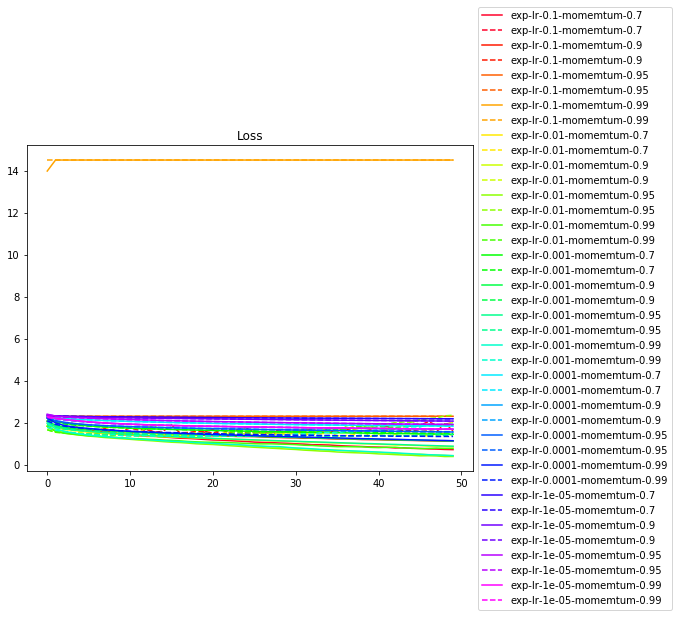

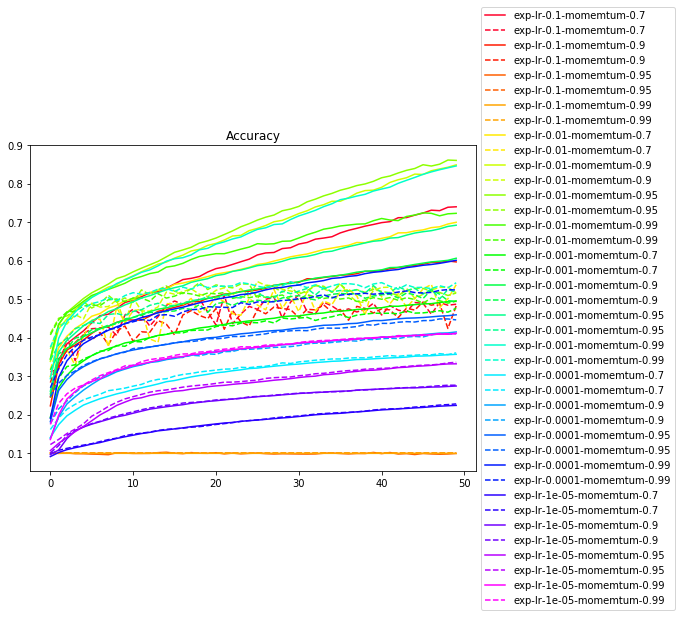

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
# color_bar = ["r", "g", "b", "y", "m", "k"]
# 顏色太多種
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()